**🔍 Data Overview:**
CIFAR-10: 60,000 32x32 color images in 10 classes.

**🤖 Traditional ML:**

* Explored K-Nearest Neighbors (KNN) and a Voting Classifier, using basic image features.

 **📉 Results:**

* KNN Test Accuracy: [0.3398]

* Voting Classifier Test Accuracy: [0.3844]



🚀 Deep Learning - CNN:
* Built and trained a CNN using TensorFlow and Keras.

 **📈 Results:**

* CNN Test Accuracy: [0.8242999911308289]

 💡 Takeaway:
* CNN excelled in image classification, showcasing automatic learning of intricate patterns.

**👉 Conclusion:**

This notebook vividly demonstrates the stark contrast between traditional machine learning and CNN in image processing and classification. The results underscore the transformative power of deep learning, paving the way for significant advancements in future computer vision applications. 🌐🚀


# Traditional ML

In [75]:
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

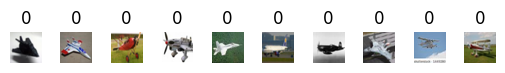

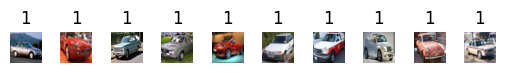

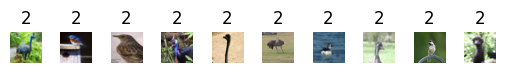

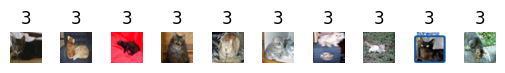

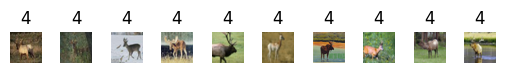

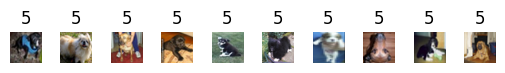

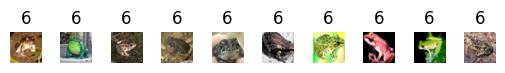

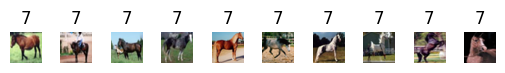

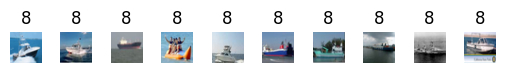

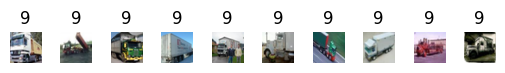

In [76]:
cnt = 1
classes = np.unique(y_train)

for cls in classes:
    # Select the first 10 images from the training data that belong to the current class
    imgs_to_show = X_train[(y_train == cls).flatten()][:10]

    # Create subplots for each of the 10 images
    for img in imgs_to_show:
        plt.subplot(10, 10, cnt)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{cls}")
        cnt += 1

    plt.show()

In [77]:
X_train = np.array([img.flatten() for img in X_train])
X_test = np.array([img.flatten() for img in X_test])


In [78]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [79]:
X_train.shape

(50000, 3072)

In [81]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,59,62,63,43,46,45,50,48,43,68,...,104,216,184,140,151,118,84,123,92,72
1,154,177,187,126,137,136,105,104,95,102,...,136,143,133,139,143,134,142,143,133,144
2,255,255,255,253,253,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,28,25,10,37,34,19,38,35,20,42,...,38,54,47,28,63,56,37,72,65,46
4,170,180,198,168,178,196,177,185,203,183,...,78,75,79,82,71,75,78,73,77,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,57,39,41,56,36,38,53,37,39,54
49996,255,245,132,254,247,134,255,249,137,254,...,82,249,174,79,252,181,81,253,181,76
49997,35,178,235,40,176,239,42,176,241,39,...,87,27,52,77,21,43,66,12,31,50
49998,189,211,240,186,208,236,185,207,235,184,...,165,195,184,169,196,189,171,195,190,171


## KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [83]:
from sklearn.metrics import accuracy_score
tr_pred = model.predict(X_train)
ts_pred = model.predict(X_test)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_test, ts_pred))


0.50534
0.3398


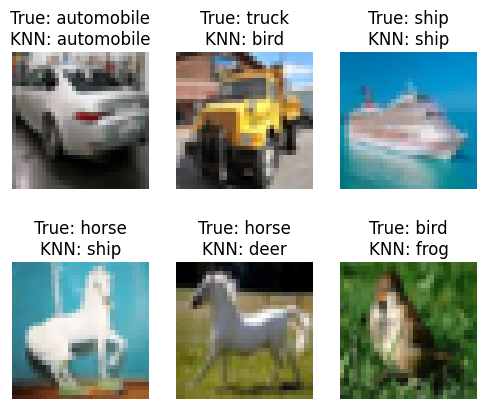

In [95]:
#  list of the class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Shuffle the data to get random samples
X_shuffled, y_shuffled = shuffle(X_test, y_test, random_state=42)

# Select random images and their corresponding true labels
random_indices = np.random.choice(len(X_shuffled), size=6, replace=False)
random_images = X_shuffled.iloc[random_indices]
true_labels = y_shuffled[random_indices]

# Make predictions using the trained KNN model
knn_predictions = model.predict(random_images)

# Display the  images
plt.figure(figsize=(6, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(np.array(random_images.iloc[i]).reshape(32, 32, 3))  # Reshape to original image dimensions
    plt.axis('off')
    true_class_name = class_names[true_labels[i, 0]]
    knn_class_name = class_names[knn_predictions[i]]
    plt.title(f"True: {true_class_name}\nKNN: {knn_class_name}")

plt.show()



##Voting Classifier

In [97]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = GaussianNB()
model4 = KNeighborsClassifier(n_neighbors=5)
vot_model = VotingClassifier(estimators=[("LR", model1), ("DT", model2),
                                         ("NB", model3), ("KNN", model4)])

In [98]:
vot_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT', DecisionTreeClassifier()),
                             ('NB', GaussianNB()),
                             ('KNN', KNeighborsClassifier())])

In [100]:
from sklearn.metrics import accuracy_score
tr_pred = vot_model.predict(X_train)
ts_pred = vot_model.predict(X_test)
print(accuracy_score(y_train, tr_pred))
print(accuracy_score(y_test, ts_pred))

0.68076
0.3844


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

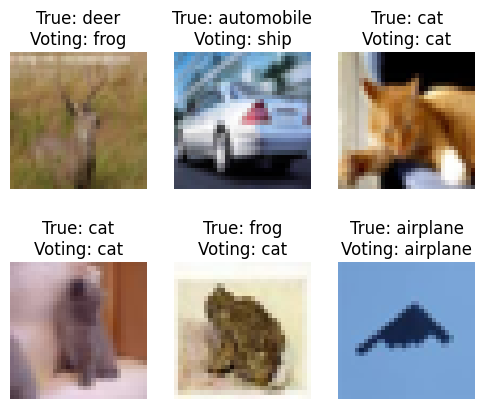

In [104]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have a list of class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Shuffle the data to get random samples
X_shuffled, y_shuffled = shuffle(X_test, y_test, random_state=42)

# Select random images and their corresponding true labels
random_indices = np.random.choice(len(X_shuffled), size=6, replace=False)
random_images = X_shuffled.iloc[random_indices]
true_labels = y_shuffled[random_indices]

# Define the individual classifiers for the Voting Classifier
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = GaussianNB()
model4 = KNeighborsClassifier(n_neighbors=5)

# Create the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('LR', model1),
    ('DT', model2),
    ('NB', model3),
    ('KNN', model4)
], voting='soft')  # 'soft' for using predicted class probabilities

# Train the Voting Classifier on the data
voting_classifier.fit(X_train, y_train)

# Make predictions using the trained Voting Classifier
voting_predictions = voting_classifier.predict(random_images)

# Display the grid of images along with true labels and Voting Classifier predictions
plt.figure(figsize=(6, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(np.array(random_images.iloc[i]).reshape(32, 32, 3))  # Reshape to original image dimensions
    plt.axis('off')
    true_class_name = class_names[true_labels[i, 0]]
    voting_class_name = class_names[voting_predictions[i]]
    plt.title(f"True: {true_class_name}\nVoting: {voting_class_name}")

plt.show()





#CNN




In [19]:
!pip install tensorflow


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [29]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

datagen.fit(train_images)

In [30]:
# Build the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=50, validation_data=(test_images, test_labels))


Epoch 1/50
782/782 [==============================] - 89s 43ms/step - loss: 1.7509 - accuracy: 0.4074 - val_loss: 1.3114 - val_accuracy: 0.5247
Epoch 2/50
782/782 [==============================] - 35s 45ms/step - loss: 1.2635 - accuracy: 0.5457 - val_loss: 1.1072 - val_accuracy: 0.6071
Epoch 3/50
782/782 [==============================] - 34s 43ms/step - loss: 1.1022 - accuracy: 0.6070 - val_loss: 1.2154 - val_accuracy: 0.6076
Epoch 4/50
782/782 [==============================] - 36s 45ms/step - loss: 1.0167 - accuracy: 0.6417 - val_loss: 1.1668 - val_accuracy: 0.5991
Epoch 5/50
782/782 [==============================] - 33s 43ms/step - loss: 0.9565 - accuracy: 0.6625 - val_loss: 0.7998 - val_accuracy: 0.7219
Epoch 6/50
782/782 [==============================] - 33s 42ms/step - loss: 0.9128 - accuracy: 0.6797 - val_loss: 0.8970 - val_accuracy: 0.6903
Epoch 7/50
782/782 [==============================] - 35s 44ms/step - loss: 0.8767 - accuracy: 0.6915 - val_loss: 0.7879 - val_accuracy:

In [33]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.5281 - accuracy: 0.8243
Test accuracy: 0.8242999911308289


1/1 [==============================] - 0s 25ms/step


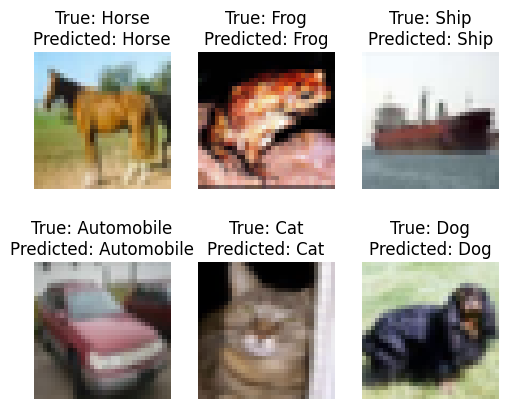

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display a grid of random images along with the model's predictions
def show_image_grid_and_predictions(model, test_images, test_labels, class_names, rows=3, cols=2):
    # Create a grid of subplots
    fig, axes = plt.subplots(rows, cols, figsize=(6, 5))

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    for i in range(rows * cols):
        # Select a random index from the test set
        index = np.random.randint(0, len(test_images))

        # Get the image and its true label
        image = test_images[index]
        true_label = class_names[np.argmax(test_labels[index])]

        # Reshape the image to match the model's expected input shape
        image = np.reshape(image, (1, 32, 32, 3))

        # Predict the class probabilities
        predictions = model.predict(image)
        predicted_label = class_names[np.argmax(predictions)]

        # Display the image in the subplot
        axes[i].imshow(test_images[index])
        axes[i].axis('off')
        axes[i].set_title(f'True: {true_label}\nPredicted: {predicted_label}')

    plt.show()

# Call the function with your trained model, test data, and class names
show_image_grid_and_predictions(model, test_images, test_labels, class_names, rows=2, cols=3)
